In [ ]:
from src.helpers.experiment import create_tsfresh_dataframe
from src.helpers.diabetes.cega import clarke_error_grid
from src.helpers.diabetes.madex import mean_adjusted_exponent_error
from pycaret.regression import setup, create_model, compare_models, predict_model
from loguru import logger
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas

In [ ]:
def run_experiment(train_parameters, unseen_data_parameters):

    source_df = create_tsfresh_dataframe(train_parameters)
    clean_df = source_df.drop(
        columns=['start', 'end', 'start_time', 'end_time'])

    setup(clean_df,
        target='label',
        feature_selection=True,
        html=False,
        silent=True,
        session_id=1974
        )

    best3 = compare_models(
        exclude=['catboost', 'xgboost'],
        sort='RMSE',
        n_select=3,
        verbose=False
    )
    master_output = {}
    for selected_model in best3:
        output = {}
        model = create_model(selected_model)
        model_name = model.__str__().split('(')[0]
        output['model'] = model
        output['model_name'] = model_name
        pd = predict_model(model)
        (_, res) = clarke_error_grid(pd['label'], pd['Label'], 'Test')
        output['internal_cga_analysis'] = res
        rmse = np.sqrt(mean_squared_error(pd['label'], pd['Label']))
        rmadex = np.sqrt(mean_adjusted_exponent_error(
            pd['label'], pd['Label']))
        output['internal_rmse'] = rmse
        output['internal_rmadex'] = rmadex

        unseen_df = create_tsfresh_dataframe(unseen_data_parameters)
        clean_unseen_df = unseen_df.drop(
            columns=['start', 'end', 'start_time', 'end_time'])
        unseen_pd = predict_model(model, data=clean_unseen_df)
        (_, res) = clarke_error_grid(unseen_pd['label'], unseen_pd['Label'], 'Test')
        output['unseen_cga_analysis'] = res
        rmse = np.sqrt(mean_squared_error(unseen_pd['label'], unseen_pd['Label']))
        rmadex = np.sqrt(mean_adjusted_exponent_error(
            unseen_pd['label'], unseen_pd['Label']))
        output['unseen_rmse'] = rmse
        output['unseen_rmadex'] = rmadex
        logger.info(output)
        master_output[model_name] = output
        # df_array.append()
    print(master_output)
    return master_output
    # final = pandas.concat(df_array)
    # final

2021-06-18 05:01:53.752 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_train_100_6_1.pkl
2021-06-18 05:01:53.940 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'train', 'train_ds_size': 100, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


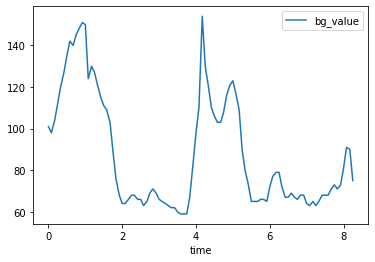

2021-06-18 05:01:54.826 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-18 05:01:54.827 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_train_100_6_1.pkl
Setup Succesfully Completed!


,Description,Value
0,session_id,1974
1,Target,label
2,Original Data,"(94, 788)"
3,Missing Values,True
4,Numeric Features,275
5,Categorical Features,512
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(65, 257)"


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.1202,34.7709,5.8967,0.9320,0.0653,0.0614
1,8.0958,126.8685,11.2636,0.8666,0.0951,0.0778
2,10.8265,227.3631,15.0786,0.8010,0.1268,0.0999
3,5.5679,56.0760,7.4884,0.9203,0.0783,0.0615
4,7.0080,90.7767,9.5277,0.8664,0.0886,0.0693
5,2.8570,14.7650,3.8425,0.9580,0.0484,0.0378
6,2.8907,17.9442,4.2361,-1.8333,0.0617,0.0415
7,2.7347,18.1996,4.2661,0.8810,0.0497,0.0336
8,8.6213,115.9690,10.7689,0.8396,0.1030,0.0842
9,4.8988,34.7752,5.8971,0.8276,0.0728,0.0618


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,6.704,105.7595,10.2839,0.8793,0.0885,0.0658


2021-06-18 05:02:46.801 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_100_6_1.pkl
2021-06-18 05:02:46.893 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 100, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


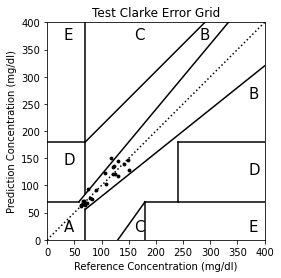

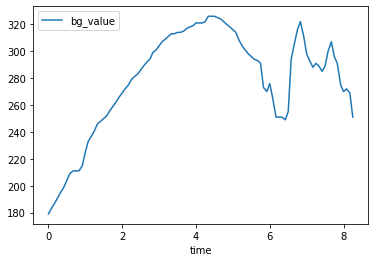

2021-06-18 05:02:47.571 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-18 05:02:47.572 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_100_6_1.pkl
2021-06-18 05:02:48.550 | INFO     | __main__:run_experiment:48 - {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1974, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.6643,43.0600,6.5620,0.9158,0.0634,0.0510
1,11.2657,323.5678,17.9880,0.6598,0.1447,0.0974
2,10.3871,215.0601,14.6649,0.8118,0.1238,0.0969
3,4.0814,24.9089,4.9909,0.9646,0.0620,0.0532
4,7.8443,112.3206,10.5981,0.8348,0.0880,0.0711
5,3.1833,25.2716,5.0271,0.9280,0.0643,0.0445
6,2.9550,15.2222,3.9016,-1.4035,0.0551,0.0427
7,2.9917,13.1290,3.6234,0.9141,0.0450,0.0394
8,7.3583,125.4653,11.2011,0.8264,0.1095,0.0721
9,6.8517,64.4619,8.0288,0.6804,0.0977,0.0863


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,9.1586,119.4162,10.9278,0.8637,0.1236,0.1114


2021-06-18 05:02:54.133 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_100_6_1.pkl
2021-06-18 05:02:54.161 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 100, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


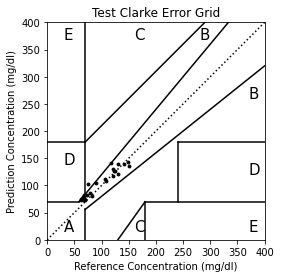

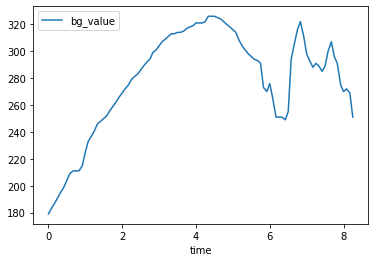

2021-06-18 05:02:54.856 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-18 05:02:54.857 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_100_6_1.pkl
2021-06-18 05:02:55.764 | INFO     | __main__:run_experiment:48 - {'model': ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1974, verbose=0, warm_start=False), 'model_name': 'ExtraTreesRegressor', 'internal_cga_analysis': [25, 2, 0, 2, 0], 'internal_rmse': 10.927769750691947, 'internal_rmadex': 12.678007072761455, 'unseen_cga_an

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.9957,60.5046,7.7785,0.8817,0.0845,0.0700
1,9.4600,259.1411,16.0979,0.7275,0.1304,0.0839
2,11.2971,231.2096,15.2056,0.7977,0.1315,0.1098
3,6.1286,76.2491,8.7321,0.8916,0.0959,0.0717
4,7.5557,100.6894,10.0344,0.8519,0.0915,0.0715
5,4.2683,21.7694,4.6658,0.9380,0.0605,0.0584
6,3.4933,24.7964,4.9796,-2.9152,0.0719,0.0504
7,4.0700,37.8345,6.1510,0.7525,0.0719,0.0499
8,8.4900,113.8069,10.6680,0.8426,0.1045,0.0864
9,6.6200,80.3094,8.9615,0.6018,0.1049,0.0823


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,5.5407,67.5902,8.2213,0.9229,0.0758,0.0566


2021-06-18 05:03:02.959 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_100_6_1.pkl
2021-06-18 05:03:02.983 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 100, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


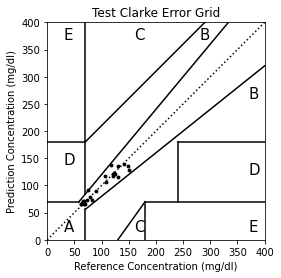

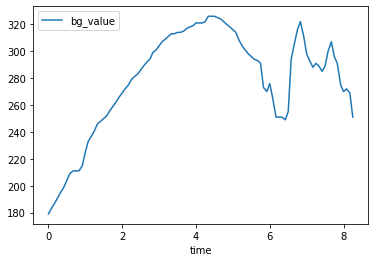

2021-06-18 05:03:03.665 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-18 05:03:03.667 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_100_6_1.pkl
2021-06-18 05:03:04.585 | INFO     | __main__:run_experiment:48 - {'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1974, verbose=0, warm_start=False), 'model_name': 'RandomForestRegressor', 'internal_cga_analysis': [28, 1, 0, 0, 0], 'internal_rmse': 8.221323410539792, 'internal_rmadex': 8.910538649287322, '

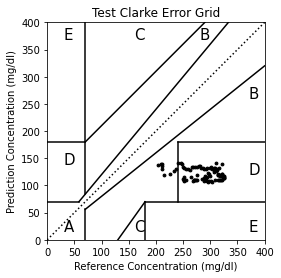

In [ ]:
parameters = {
    'ohio_no': 559,
    'scope': 'train',
    'train_ds_size': 100,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}

test_parameters = {
    'ohio_no': 559,
    'scope': 'test',
    'train_ds_size': 100,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}

output = run_experiment(parameters, test_parameters)

In [ ]:
output

{'GradientBoostingRegressor': {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=1974, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0, warm_start=False),
  'model_name': 'GradientBoostingRegressor',
  'internal_cga_analysis': [27, 2, 0, 0, 0],
  'internal_rmse': 10.283941812187193,
  'internal_rmadex': 11.13894160487266,
  'unseen_cga_analysis': [0, 9, 0, 85, 0],
  'unseen_rmse': 165.79541384792708,
  'unseen_rmadex': 26288.862

In [ ]:
pandas.DataFrame.from_dict(output, orient='index')

,model,model_name,internal_cga_analysis,internal_rmse,internal_rmadex,unseen_cga_analysis,unseen_rmse,unseen_rmadex
GradientBoostingRegressor,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingRegressor,"[27, 2, 0, 0, 0]",10.283942,11.138942,"[0, 9, 0, 85, 0]",165.795414,26288.862476
ExtraTreesRegressor,"(ExtraTreeRegressor(ccp_alpha=0.0, criterion='...",ExtraTreesRegressor,"[25, 2, 0, 2, 0]",10.927770,12.678007,"[0, 9, 0, 85, 0]",162.343068,19847.053757
RandomForestRegressor,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",RandomForestRegressor,"[28, 1, 0, 0, 0]",8.221323,8.910539,"[0, 9, 0, 85, 0]",166.984039,25434.040689


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d560f233-0034-499f-bc4e-7ada8795cb9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>